100%|██████████| 108/108 [00:19<00:00,  5.56it/s]


39
      question  worker  answer
1790         0      35       0
1771         0      16       1
1782         0      27       0
1769         0      14       1
1767         0      12       1
...        ...     ...     ...
1323       107      36       0
1309       107      22       1
1315       107      28       0
1310       107      23       0
1298       107      11       0

[4212 rows x 3 columns]
39 & 108 & 4212 & 108.0$\pm$0.0 & 39.0$\pm$0.0 & 213
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.8388888888888889 1.0
t-test Ttest_relResult(statistic=-10.174308639479676, pvalue=2.3261862063019418e-22)
z-score 0.4382384968626677
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.8388888888888889 1.0
t-test Ttest_relResult(statistic=-10.174308639479676, pvalue=2.3261862063019418e-22)
z-score 0.4382384968626677
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.8388888888888889 1.0
t-test Ttest_relResult(statistic=-

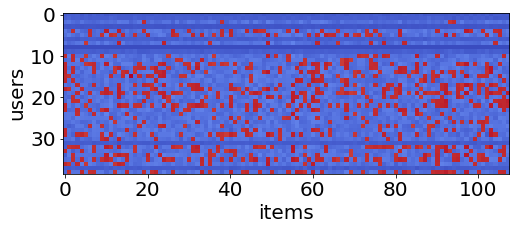

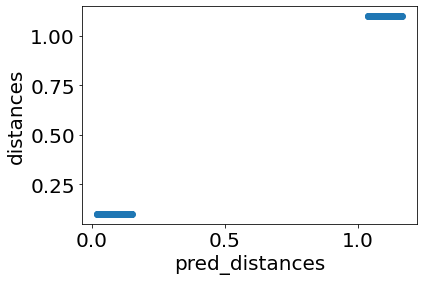

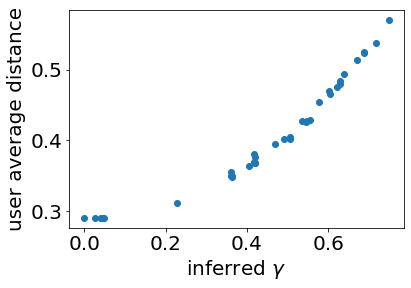

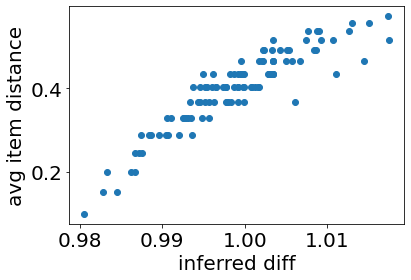

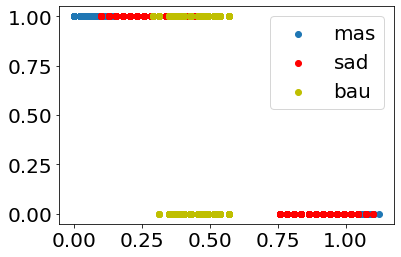

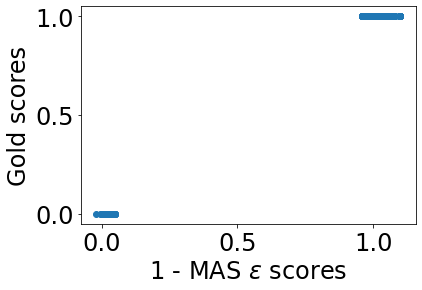

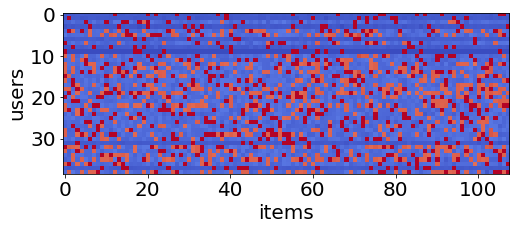

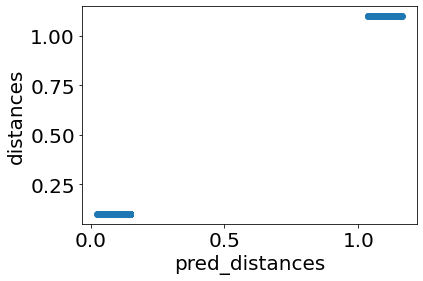

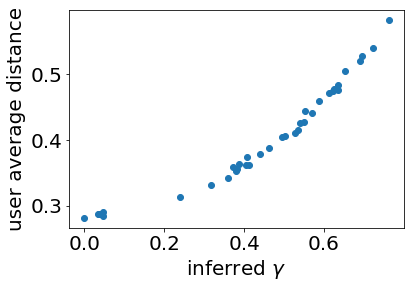

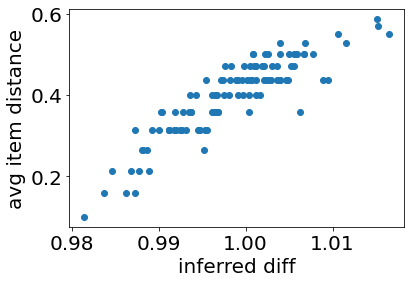

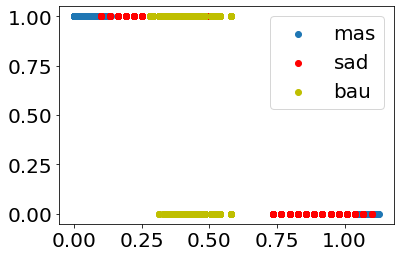

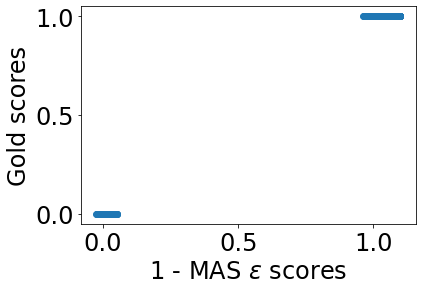

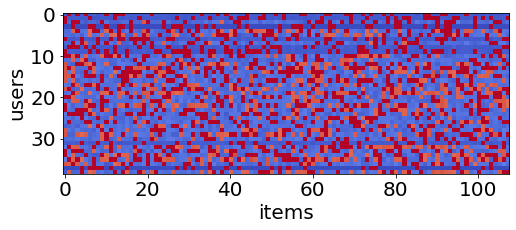

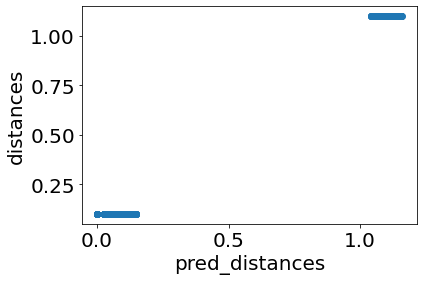

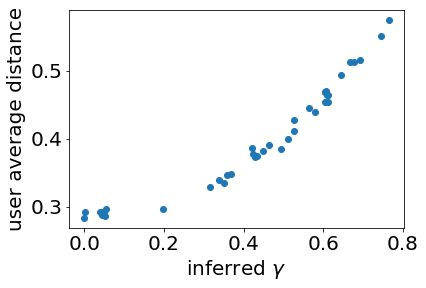

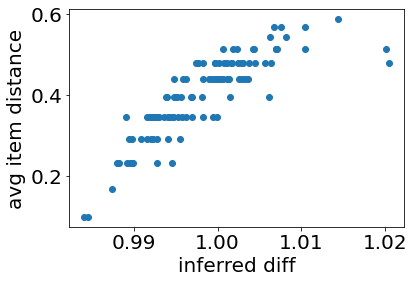

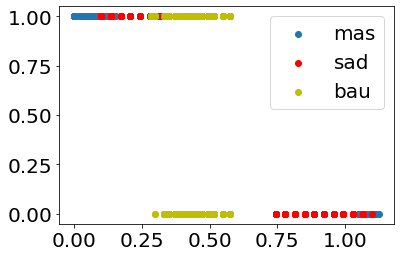

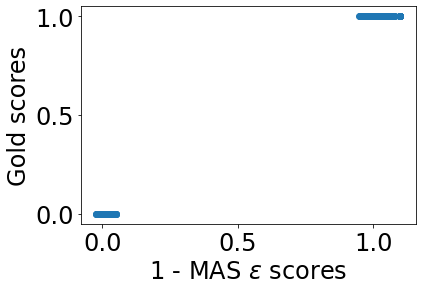

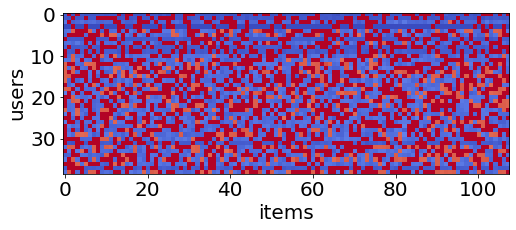

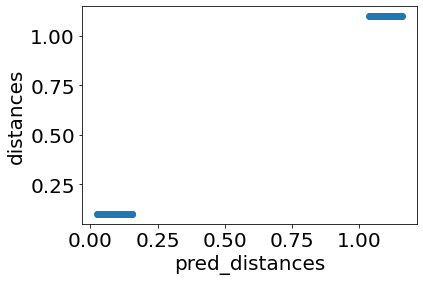

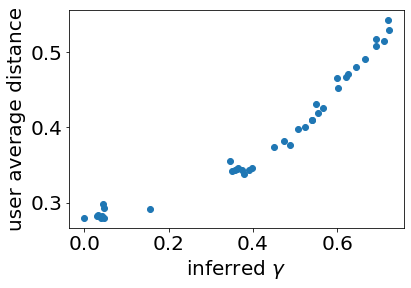

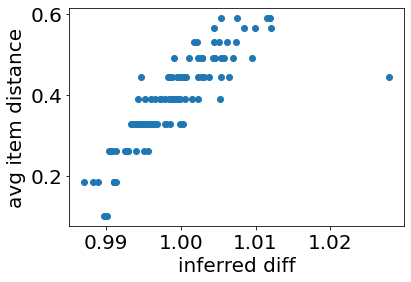

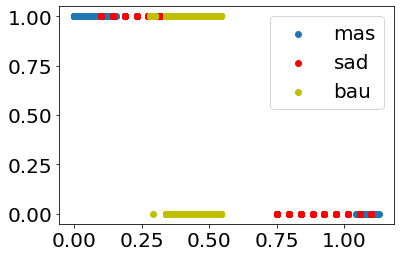

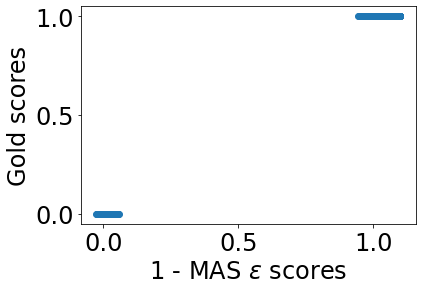

In [ ]:

import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("noise_data/answer_waterbird_noise0.85.csv", sep=",")
truth_df = pd.read_csv("data/truth_waterbird.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():


    for i in range(8):
        dataRed.append(int((minSamples)-(5*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples)-(5*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        waterbird_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        waterbird_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        waterbird_exp.describe_data()

        waterbird_exp.train()

        waterbird_exp.test(debug=True)
        _ = waterbird_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        w_f1_MAS.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.mas_preds.values()), average='weighted'))
        w_f1_BAU.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.bau_preds.values()), average='weighted'))
        w_f1_SAD.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.sad_preds.values()), average='weighted'))

        m_f1_MAS.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.mas_preds.values()), average='macro'))
        m_f1_BAU.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.bau_preds.values()), average='macro'))
        m_f1_SAD.append(100*f1_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.sad_preds.values()), average='macro'))

        accMAS.append(100*accuracy_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.mas_preds.values()), normalize=True))
        accBAU.append(100*accuracy_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.bau_preds.values()), normalize=True))
        accSAD.append(100*accuracy_score(list(waterbird_exp.golddict.values()), list(waterbird_exp.sad_preds.values()), normalize=True))

    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))



grapher()



















In [ ]:


plt.plot(np.array(dataRed),np.array(m_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(m_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(m_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(m_f1_SAD-np.std(m_f1_SAD)),np.array(m_f1_SAD+np.std(m_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(m_f1_MAS-np.std(m_f1_MAS)),np.array(m_f1_MAS+np.std(m_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(m_f1_BAU-np.std(m_f1_BAU)),np.array(m_f1_BAU+np.std(m_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Waterbird)_0.85N (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Waterbird_0.85N(Macro_F1).png')
plt.show()





In [ ]:



plt.plot(np.array(dataRed),np.array(w_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(w_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(w_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(w_f1_SAD-np.std(w_f1_SAD)),np.array(w_f1_SAD+np.std(w_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(w_f1_MAS-np.std(w_f1_MAS)),np.array(w_f1_MAS+np.std(w_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(w_f1_BAU-np.std(w_f1_BAU)),np.array(w_f1_BAU+np.std(w_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Waterbird_0.85N (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Waterbird_0.85N(Weighted_F1).png')
plt.show()




In [ ]:


plt.plot(np.array(dataRed),np.array(accSAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(accMAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(accBAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(accSAD-np.std(accSAD)),np.array(accSAD+np.std(accSAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(accMAS-np.std(accMAS)),np.array(accMAS+np.std(accMAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(accBAU-np.std(accBAU)),np.array(accBAU+np.std(accBAU)),alpha=0.2,color='g')


plt.title("C_Waterbird_0.85N (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Waterbird_0.85N(Accuracy).png')
plt.show()











